In [1]:
string = '29texqevzr3gwvmrpjvde637h4gwd6'

In the above example, the useful unit for analysis would be a single character, as there are no words or sentences in the string of characters. We can use the Python list() constructor to tokenize this string.

In [2]:
# Use the list() constructor to tokenize
tokens = list(string)

# look at the first 10 tokens
print(tokens[:10])

['2', '9', 't', 'e', 'x', 'q', 'e', 'v', 'z', 'r']


In [3]:
# Random sentence
mysentence = 'Last Friday I saw a spotted striped blue worm shake hands with a legless lizard.'

# Split on a space
mysentence.split(" ")

['Last',
 'Friday',
 'I',
 'saw',
 'a',
 'spotted',
 'striped',
 'blue',
 'worm',
 'shake',
 'hands',
 'with',
 'a',
 'legless',
 'lizard.']

Text(0.5, 1.0, 'Count plot of random_seq characters')

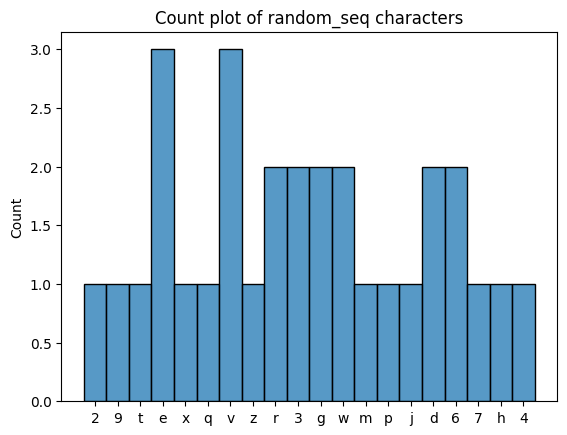

In [4]:
import seaborn as sns

ax = sns.histplot(tokens)
ax.set_title('Count plot of random_seq characters')

In [ ]:
import pandas as pd
grocery = pd.read_csv('grocery_list.csv')
items_list = grocery['items'].tolist()
print(items_list)

In [ ]:
# Count the frequency of each item in the list
grocery['items'].value_counts()

In [ ]:
# Create lower case items
grocery['items'] = grocery['items'].apply(lambda x: x.lower())

# Re-do the value counts
grocery['items'].value_counts()

In [7]:
# Random string of characters
string = 'D]ehjZe_*-e!?fdfW)_/zQ2#8*LKH#'

# Import the regular expressions package
import re

# Filter and replace with nothing
re.sub('[^a-zA-Z 0-9]', '', string)

'DehjZeefdfWzQ28LKH'

In [8]:
# download spacy module
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 2.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
import spacy
from spacy.tokenizer import Tokenizer

# Load the pre-trained statistical model for English
import en_core_web_lg
nlp = en_core_web_lg.load()

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)
# Sample text
sample = "They watched the 42 dancing piglets with panda bear tummies in the swimming pool."

# Tokenize and print out list of tokens
tokens = [token.text for token in tokenizer(sample)]
print(tokens)

['They', 'watched', 'the', '42', 'dancing', 'piglets', 'with', 'panda', 'bear', 'tummies', 'in', 'the', 'swimming', 'pool.']


In [2]:
import spacy
from spacy.tokenizer import Tokenizer

# Load the pre-trained statistical model for English
import en_core_web_lg
nlp = en_core_web_lg.load()

# spaCy's default stop words
stop_list = list(nlp.Defaults.stop_words)
print("The number of stop words: ", len(stop_list))

print("The first 10 stop words are: ", stop_list[:10])

The number of stop words:  326
The first 10 stop words are:  ['while', 'anyone', 'herein', 'together', 'ca', 'across', 'both', 'him', 'the', 'yourself']


In [3]:
# Open and save the raw files
with open('wonderland.txt', encoding='utf-8', errors='ignore') as f:
  wonder_raw = f.read()

# parse the raw text
doc = nlp(wonder_raw)
print('The type of output is: ', type(doc))
print(doc[:100])

The type of output is:  <class 'spacy.tokens.doc.Doc'>
Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, “and what is the use of a book,” thought Alice “without pictures or conversations?” So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making


In [4]:
# remove the stop words and the punctuation

# initialize a list to hold the tokens
tokens_nostop = []

# loop over each token in the document (doc)
for token in doc:
  if not token.is_stop and not token.is_punct:
    tokens_nostop.append(token.text.lower())

# print the first 50 tokens
print(tokens_nostop[:50])

['alice', 'beginning', 'tired', 'sitting', 'sister', 'bank', 'having', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', 'use', 'book', 'thought', 'alice', 'pictures', 'conversations', 'considering', 'mind', 'hot', 'day', 'feel', 'sleepy', 'stupid', 'pleasure', 'making', 'daisy', 'chain', 'worth', 'trouble', 'getting', 'picking', 'daisies', 'suddenly', 'white', 'rabbit', 'pink', 'eyes', 'ran', 'close', 'remarkable', 'alice', 'think', 'way', 'hear', 'rabbit', 'oh']


In [9]:
from collections import Counter
import pandas as pd

# sum up the word counts and store in a dict
tokens_dict = Counter(tokens_nostop)
# print(tokens_dict)
# print(list(tokens_dict.items()))

# convert to a dataframe
tokens_wc = pd.DataFrame(list(tokens_dict.items()), columns = ['word', 'count'])

# rank the words by how frequently they occur
tokens_wc['rank'] = tokens_wc['count'].rank(method='first', ascending=False)

# count all of the words in the document and calculate their percentage
total = tokens_wc['count'].sum()
tokens_wc['pct_total'] = tokens_wc['count'].apply(lambda x: (x / total)*100)

# take a look at the dataframe with new results
tokens_wc.head(10)

,word,count,rank,pct_total
0,alice,28,1.0,2.816901
1,beginning,1,176.0,0.100604
2,tired,1,177.0,0.100604
3,sitting,2,81.0,0.201207
4,sister,4,39.0,0.402414
5,bank,1,178.0,0.100604
6,having,2,82.0,0.201207
7,twice,1,179.0,0.100604
8,peeped,1,180.0,0.100604
9,book,2,83.0,0.201207


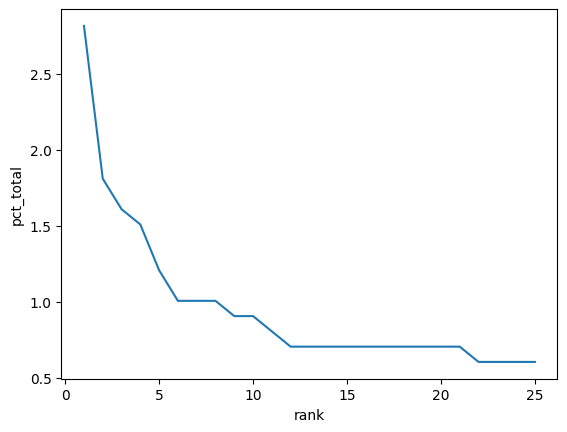

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# create a new dataframe of the top 25 ranked words
tokens_wc_top25 = tokens_wc[tokens_wc['rank'] <= 25]

# Line plot of rank vs. percent total
sns.lineplot(x='rank', y='pct_total', data=tokens_wc_top25)

plt.show()

In [11]:
!pip install squarify

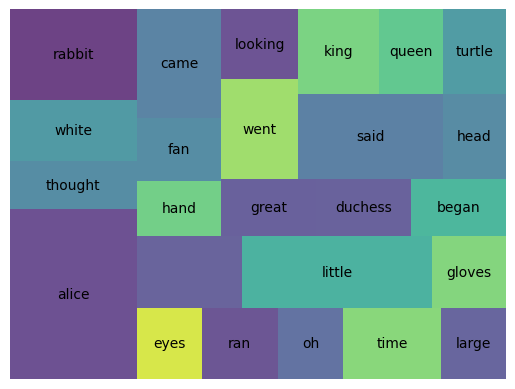

In [12]:
import squarify

squarify.plot(sizes=tokens_wc_top25['pct_total'], label=tokens_wc_top25['word'], alpha=0.8)
plt.axis('off')
plt.show()

In [13]:
# add additional stop words to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(['alice', 'rabbit'])

In [14]:
# Initialize a list to hold the tokens
tokens_nostop_add = []

# loop over each token in the document (doc)
for token in doc:
  if token.text.lower() not in STOP_WORDS and not token.is_punct:
    tokens_nostop_add.append(token.text.lower())

# sum up the word counts and store in a dict & dataframe
tokens_dict_add = Counter(tokens_nostop_add)
tokens_wc_add = pd.DataFrame(list(tokens_dict_add.items()), columns = ['word', 'count'])

# rank the words & create a percentage column
tokens_wc_add['rank'] = tokens_wc_add['count'].rank(method='first', ascending=False)
total = tokens_wc_add['count'].sum()
tokens_wc_add['pct_total'] = tokens_wc_add['count'].apply(lambda x: (x / total)*100)

# create a new dataframe of the NEW top 25 ranked words
tokens_wc_add_top25 = tokens_wc_add[tokens_wc_add['rank'] <= 25]

In [15]:
tokens_wc_add_top25.head(10)

,word,count,rank,pct_total
13,thought,8,9.0,0.841220
31,white,10,4.0,1.051525
33,eyes,6,20.0,0.630915
34,ran,7,10.0,0.736067
37,think,5,25.0,0.525762
40,oh,6,21.0,0.630915
47,time,9,7.0,0.946372
65,large,6,22.0,0.630915
68,\n,10,5.0,1.051525
70,little,18,1.0,1.892744


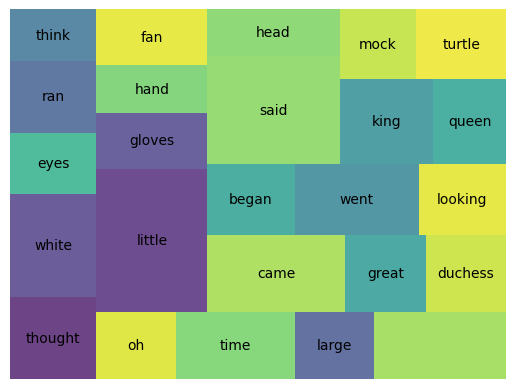

In [17]:
squarify.plot(sizes=tokens_wc_add_top25['pct_total'], label=tokens_wc_add_top25['word'], alpha=0.8)
plt.axis('off')
plt.show()

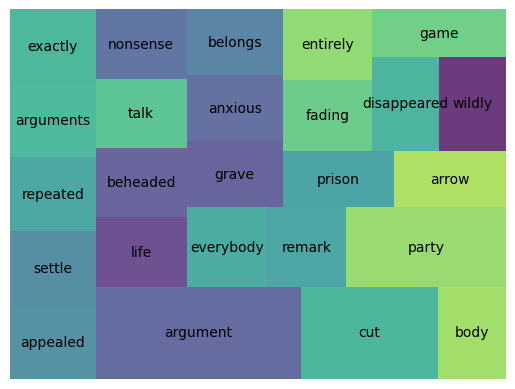

In [18]:
# create a new dataframe of the bottom 25 words
tokens_wc_end25 = tokens_wc.tail(25)

squarify.plot(sizes=tokens_wc_end25['pct_total'], label=tokens_wc_end25['word'], alpha=0.8)
plt.axis('off')
plt.show()

In [19]:
# import the library
import spacy

# create an example sentence
sent = "The rabbit-hole went straight on like a tunnel for some way, and then dipped suddenly down, so suddenly that Alice had not a moment to think about stopping herself before she found herself falling down a very deep well."

# load the language library
nlp = spacy.load("en_core_web_lg")
doc = nlp(sent)

# lemma attributes
for token in doc:
  print(token.text, " --> ", token.lemma_)

The  -->  the
rabbit  -->  rabbit
-  -->  -
hole  -->  hole
went  -->  go
straight  -->  straight
on  -->  on
like  -->  like
a  -->  a
tunnel  -->  tunnel
for  -->  for
some  -->  some
way  -->  way
,  -->  ,
and  -->  and
then  -->  then
dipped  -->  dip
suddenly  -->  suddenly
down  -->  down
,  -->  ,
so  -->  so
suddenly  -->  suddenly
that  -->  that
Alice  -->  Alice
had  -->  have
not  -->  not
a  -->  a
moment  -->  moment
to  -->  to
think  -->  think
about  -->  about
stopping  -->  stop
herself  -->  herself
before  -->  before
she  -->  she
found  -->  find
herself  -->  herself
falling  -->  fall
down  -->  down
a  -->  a
very  -->  very
deep  -->  deep
well  -->  well
.  -->  .


In [20]:
# Tokenizing and lemmatizing in one function

def get_lemmas(text):
    # Initialize a list
    lemmas = []

    # Convert the input text into a spaCy doc
    doc = nlp(text)

    # Remove stop words, punctuation, and personal pronouns (PRON)
    for token in doc:
        if not token.is_stop and not token.is_punct and token.pos_ != 'PRON':
            lemmas.append(token.lemma_)

    # Return the lemmatized tokens
    return lemmas

In [21]:
# Example text (https://en.wikipedia.org/wiki/Geology)
geology = [
    "Geology describes the structure of the Earth on and beneath its surface, and the processes that have shaped that structure.",
    "It also provides tools to determine the relative and absolute ages of rocks found in a given location, and also to describe the histories of those rocks.",
    "By combining these tools, geologists are able to chronicle the geological history of the Earth as a whole, and also to demonstrate the age of the Earth.",
    "Geology provides the primary evidence for plate tectonics, the evolutionary history of life, and the Earth's past climates."
]

# Find the lemmas for each sentence in the above text
geology_lemma = [get_lemmas(sentence) for sentence in geology]
print(geology_lemma)

[['geology', 'describe', 'structure', 'Earth', 'beneath', 'surface', 'process', 'shape', 'structure'], ['provide', 'tool', 'determine', 'relative', 'absolute', 'age', 'rock', 'find', 'give', 'location', 'describe', 'history', 'rock'], ['combine', 'tool', 'geologist', 'able', 'chronicle', 'geological', 'history', 'Earth', 'demonstrate', 'age', 'Earth'], ['geology', 'provide', 'primary', 'evidence', 'plate', 'tectonic', 'evolutionary', 'history', 'life', 'Earth', 'past', 'climate']]
